In [1]:
def filter_zero_metrics_for_radar(metrics: dict):
    """
    Removes metrics with value 0.0 from a radar chart dictionary.
    Returns a new dictionary and prints the removed keys.
    """
    removed = {k: v for k, v in metrics.items() if v == 0.0}
    if removed:
        print("📉 Metrics excluded from radar chart (value = 0.0):")
        for k in removed:
            print(f" - {k}")

    filtered = {k: v for k, v in metrics.items() if v != 0.0}
    return filtered


In [2]:
# Regular radar chart plotting function
def plot_radar(metrics: dict, title):
    labels = list(metrics.keys())
    values = list(metrics.values())
    values += values[:1]  # close the loop
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, size=14)
    ax.grid(True)
    plt.tight_layout()

    # Save figure
    output_path = f"../figures/{title.lower().replace(' ', '_')}.png"
    plt.savefig(output_path)
    plt.show()

# Normalized radar chart plotting function
def plot_normalized_radar(metrics: dict, title):
    labels = list(metrics.keys())
    values = list(metrics.values())
    values += values[:1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.3)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, size=14)
    ax.set_ylim(0, 1)
    plt.tight_layout()

    # Save figure
    output_path = f"../figures/{title.lower().replace(' ', '_')}.png"
    plt.savefig(output_path)
    plt.show()

# Bar chart plotting
def plot_team_impact_bar(metrics: dict, title):
    colors = []
    for key, value in metrics.items():
        if key == "+/- per 90":
            colors.append("#a8d5a3" if value >= 0 else "#e58b8b")  # green or red
        elif key == "On-Off Net Goals/90":
            colors.append("#a8d5a3" if value >= 0 else "#e58b8b")  # green or red
        elif key == "Team Goals For/90":
            colors.append("#4caf50")
        elif key == "Team Goals Against/90":
            colors.append("#f44336")
        else:
            colors.append("grey")  # fallback color

    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(metrics.keys(), metrics.values(), color=colors)

    # Annotate bars with values
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.2f}", ha='center', va='bottom')

    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Per 90 Minutes")
    ax.axhline(0, color='black', linewidth=0.8)
    plt.tight_layout()

    # Save the figure
    output_path = f"../figures/{title.lower().replace(' ', '_')}.png"
    plt.savefig(output_path)
    plt.show()


In [6]:
import matplotlib.pyplot as plt

def plot_defensive_bar_chart(metrics: dict, title):
    labels = list(metrics.keys())
    values = list(metrics.values())

    # Optional color logic: you can refine this if you want more nuance
    colors = []
    for label in labels:
        if 'Interception' in label or 'Blocked' in label:
            colors.append('#2a9d8f')  # Green for solid defensive actions
        elif 'Clearance' in label or 'Error' in label:
            colors.append('#e76f51')  # Red for weaknesses
        else:
            colors.append('#f4a261')  # Orange for neutral/ambiguous

    # Plot
    plt.figure(figsize=(8, 4.5))
    bars = plt.barh(labels, values, color=colors)
    plt.xlabel("Per 90 Minutes")
    plt.title("Alexander Thongla-Iad Warneryd – Defensive Stats (per 90)")
    plt.xlim(0, max(values) + 0.5)

    # Add values to bars
    for bar in bars:
        plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():.2f}', va='center', fontsize=10)
    plt.tight_layout()

    # Save the figure
    output_path = f"../figures/{title.lower().replace(' ', '_')}.png"
    plt.savefig(output_path, dpi=300)
    plt.show()

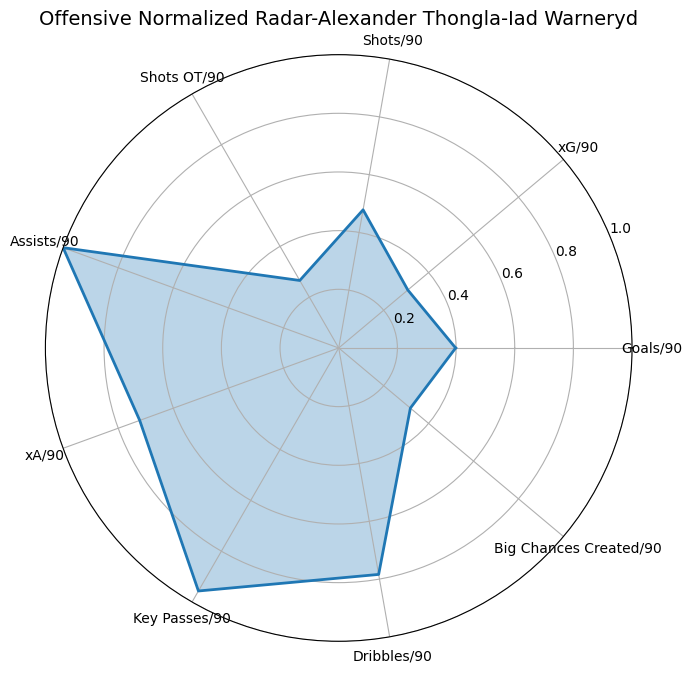

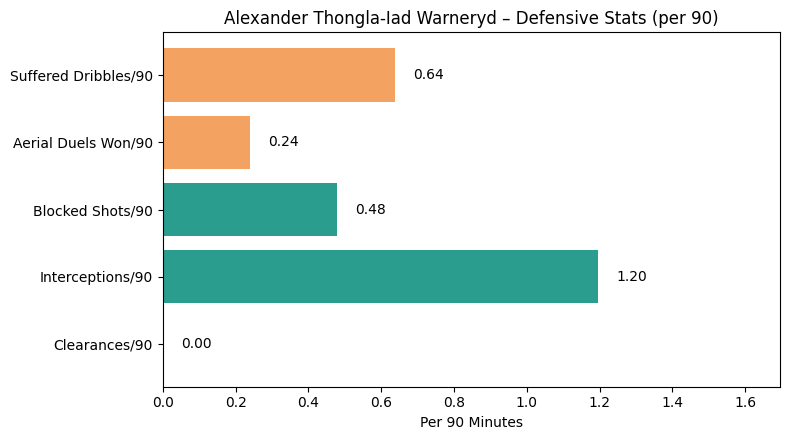

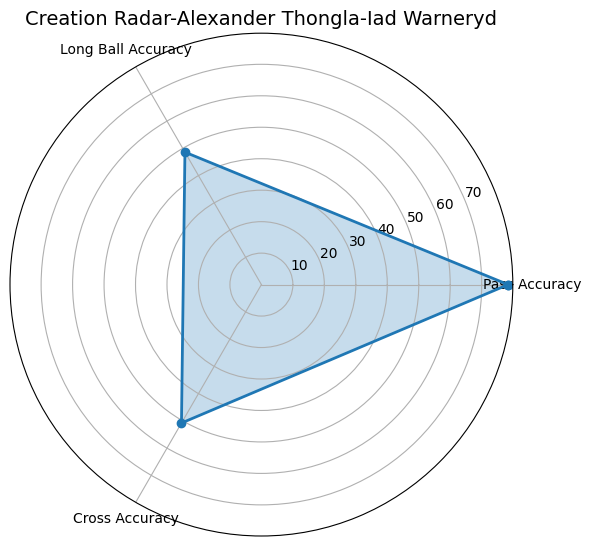

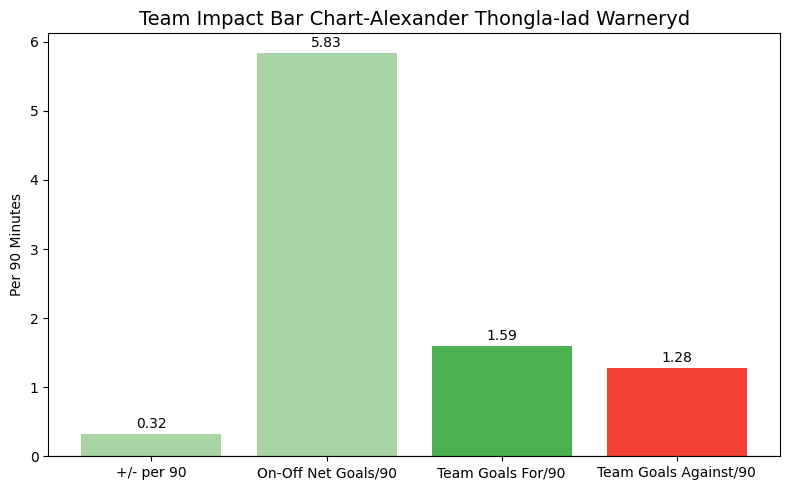

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("../data/alexander_thongla-iad_warneryd_2025_stats.csv")
stats = df.set_index("statistic")["value"].astype(float).to_dict()

# Per 90 metrics
factor_90 = 90 / stats["minutes_played"] # Normalization factor

# 1.1. Offensive metrics radar
offensive_metrics = {
    "Goals/90": stats["goals_scored"] * factor_90,
    "xG/90": stats["xG"] * factor_90,
    "Shots/90": stats["shots"] * factor_90,
    "Shots OT/90": stats["shots_on_target"] * factor_90,
    "Assists/90": stats["assists"] * factor_90,
    "xA/90": stats["xA"] * factor_90,
    "Key Passes/90": stats["key_passes"] * factor_90,
    "Dribbles/90": stats["successful_dribbles"] * factor_90,
    "Big Chances Created/90": stats["big_chances_created"] * factor_90
}

# 1.2. Expected maximum offensive values for normalization
expected_max = {
    "Goals/90": 0.4,
    "xG/90": 0.35,
    "Shots/90": 2.5,
    "Shots OT/90": 1.2,
    "Assists/90": 0.3,
    "xA/90": 0.35,
    "Key Passes/90": 2.0,
    "Dribbles/90": 6.0,
    "Big Chances Created/90": 0.5
}

# 2. Creation metrics radar
radar_creation = {
    "Pass Accuracy": stats["pass_accuracy"],
    "Long Ball Accuracy": stats["long_ball_accuracy"],
    "Cross Accuracy": stats["cross_accuracy"]
}

# 3. Defensive metrics radar
defensive_metrics = {
    "Clearances/90": stats["clearances"] * factor_90,
    "Interceptions/90": stats["interceptions"] * factor_90,
    "Blocked Shots/90": stats["blocked_shots"] * factor_90,
    "Aerial Duels Won/90": stats["aerial_duels_won"] * factor_90,
    "Suffered Dribbles/90": stats["suffered_dribbles"] * factor_90
}

# 4. Team impact radar
radar_team = {
    "+/- per 90": stats["plus_minus_per90"],
    "On-Off Net Goals/90": stats["onOff_net_goals_per90"],
    "Team Goals For/90": stats["team_goals_scored_on"] * factor_90,
    "Team Goals Against/90": stats["team_goals_conceded_on"] * factor_90
}

filtered_metrics_off = filter_zero_metrics_for_radar(offensive_metrics)
filtered_metrics_cr = filter_zero_metrics_for_radar(radar_creation)
filtered_metrics_team_impact = filter_zero_metrics_for_radar(radar_team)

# For offensive metrics: normalize the values to a 0–1 range and create the normalized radar chart
normalized_offensive = {k: min(v / expected_max[k], 1.0) for k, v in filtered_metrics_off.items()}
plot_normalized_radar(normalized_offensive, title="Offensive Normalized Radar-Alexander Thongla-Iad Warneryd")

plot_defensive_bar_chart(defensive_metrics, title="Defensive Bar Chart-Alexander Thongla-Iad Warneryd")
plot_radar(filtered_metrics_cr, title="Creation Radar-Alexander Thongla-Iad Warneryd")

# For Team impact metrics: radar chart does not make sense: using bar char instead
plot_team_impact_bar(filtered_metrics_team_impact, title="Team Impact Bar Chart-Alexander Thongla-Iad Warneryd")

In [4]:
print(offensive_metrics)
print(radar_creation)
print(defensive_metrics)

{'Goals/90': 0.15943312666076173, 'xG/90': 0.10761736049601417, 'Shots/90': 1.195748449955713, 'Shots OT/90': 0.31886625332152346, 'Assists/90': 0.4782993799822852, 'xA/90': 0.2527015057573073, 'Key Passes/90': 1.9131975199291409, 'Dribbles/90': 4.703277236492471, 'Big Chances Created/90': 0.15943312666076173}
{'Pass Accuracy': 78.4, 'Long Ball Accuracy': 48.6, 'Cross Accuracy': 50.8}
{'Clearances/90': 0.0, 'Interceptions/90': 1.195748449955713, 'Blocked Shots/90': 0.4782993799822852, 'Aerial Duels Won/90': 0.2391496899911426, 'Errors Leading to Goal/90': 0.0, 'Suffered Dribbles/90': 0.6377325066430469}
